<a href="https://colab.research.google.com/github/Ansalnakhan/TSA/blob/main/ansalnaSOHandRUL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/B0018.csv")
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [ ]:
data=data.drop_duplicates(subset=['cycle'], keep='last')
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
196,196,1,24,2008-04-02 15:25:41,1.856487,3.277170,-0.006528,34.230853,-0.0006,0.0,3690.234
392,392,2,24,2008-04-02 19:43:48,1.846327,3.300245,-0.000448,34.392137,-0.0006,0.0,3672.344
587,587,3,24,2008-04-03 00:01:06,1.835349,3.327451,0.001026,34.232779,-0.0006,0.0,3651.641
781,781,4,24,2008-04-03 04:16:37,1.835263,3.314182,-0.002234,34.413450,-0.0006,0.0,3631.563
975,975,5,24,2008-04-03 08:33:25,1.834646,3.305497,0.000009,34.345885,-0.0006,0.0,3629.172
...,...,...,...,...,...,...,...,...,...,...,...
49092,49092,164,24,2008-05-26 10:44:38,1.293464,3.615561,-0.002548,34.075649,0.0006,0.0,2793.390
49389,49389,165,24,2008-05-26 15:30:43,1.288003,3.621191,-0.002460,33.991350,0.0006,0.0,2793.390
49686,49686,166,24,2008-05-26 20:21:04,1.287453,3.619185,0.000478,34.059198,0.0006,0.0,2792.485
49984,49984,167,24,2008-05-27 15:52:41,1.309015,3.595365,-0.002342,34.556514,0.0006,0.0,2802.016


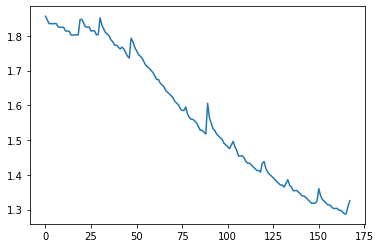

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(data["capacity"])),data["capacity"])
plt.show()

In [ ]:
capacity=data[["capacity"]]
capacity=capacity.set_index(pd.Index(range(len(capacity))))
capacity

,capacity
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834646
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


In [ ]:
soh=[]
for i in range(len(capacity)):
  soh.append(capacity.loc[i].at["capacity"]/capacity.loc[0].at["capacity"])

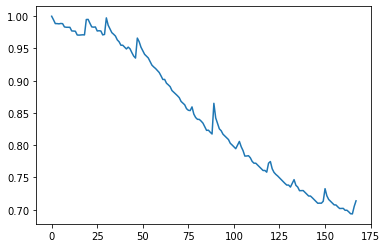

In [ ]:
plt.plot(range(len(soh)),soh)
plt.show()

In [ ]:
capacity=np.asarray(capacity)

In [ ]:
type(capacity)

numpy.ndarray

In [ ]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(soh[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]  

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [ ]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 0.6384
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0621
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0558
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0419
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0131
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0173
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0077
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 8.5601e-04
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0027


In [ ]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 6ms/step


0.00029889434082960625

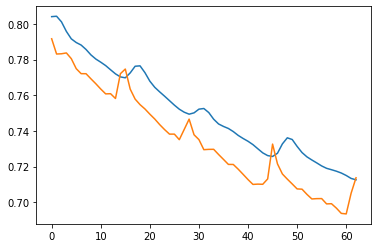

In [ ]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)

In [ ]:
preds = model.predict(X)

6/6 [==============================] - 0s 3ms/step


In [ ]:
preds

array([[0.9701741 ],
       [0.96864283],
       [0.96835864],
       [0.9680851 ],
       [0.9667711 ],
       [0.96505153],
       [0.96383524],
       [0.9631153 ],
       [0.96162564],
       [0.9598297 ],
       [0.95823497],
       [0.95634735],
       [0.9544584 ],
       [0.9532738 ],
       [0.95306414],
       [0.9545608 ],
       [0.9606742 ],
       [0.96767175],
       [0.97064114],
       [0.96856457],
       [0.96556205],
       [0.9637149 ],
       [0.9618752 ],
       [0.9600763 ],
       [0.95848846],
       [0.9566268 ],
       [0.95641905],
       [0.9612838 ],
       [0.96577513],
       [0.96566886],
       [0.9612701 ],
       [0.95696604],
       [0.9536795 ],
       [0.9503397 ],
       [0.94676334],
       [0.9431652 ],
       [0.94047326],
       [0.9383641 ],
       [0.9366509 ],
       [0.93574315],
       [0.9348453 ],
       [0.9326323 ],
       [0.9288888 ],
       [0.92699325],
       [0.9322527 ],
       [0.9389347 ],
       [0.94078064],
       [0.936

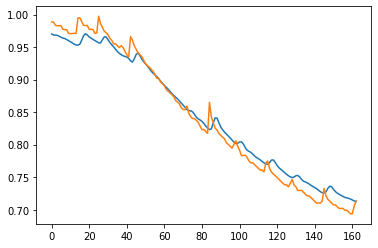

In [ ]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)

Predicting Capacity

In [ ]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(capacity[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k] 

In [ ]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 2.0107
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.2740
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0867
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 0.2010
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0416
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0727
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0347
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 10/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0143


In [ ]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [ ]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 7ms/step


0.0023133880209421404

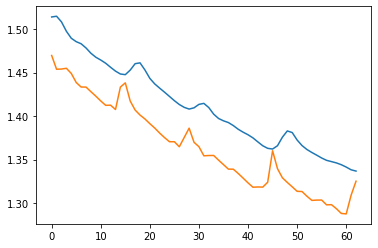

In [ ]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.show()

In [ ]:
preds = model.predict(X)

6/6 [==============================] - 0s 4ms/step


In [ ]:
preds

array([[1.8357178],
       [1.832893 ],
       [1.8325558],
       [1.8320001],
       [1.8295189],
       [1.8260205],
       [1.8235887],
       [1.8223364],
       [1.81953  ],
       [1.8158928],
       [1.8126711],
       [1.8092864],
       [1.8054696],
       [1.8030916],
       [1.802914 ],
       [1.8060669],
       [1.817613 ],
       [1.831712 ],
       [1.8379124],
       [1.83283  ],
       [1.8267677],
       [1.8232872],
       [1.8200157],
       [1.8163598],
       [1.8131539],
       [1.8098552],
       [1.8094981],
       [1.8184692],
       [1.8281473],
       [1.8280435],
       [1.818213 ],
       [1.8100888],
       [1.8037828],
       [1.7974538],
       [1.7904001],
       [1.7834322],
       [1.7782334],
       [1.774198 ],
       [1.7710637],
       [1.7691249],
       [1.7675169],
       [1.7633213],
       [1.7557724],
       [1.7523075],
       [1.7621416],
       [1.7760357],
       [1.7801534],
       [1.7709538],
       [1.7607331],
       [1.7528971],


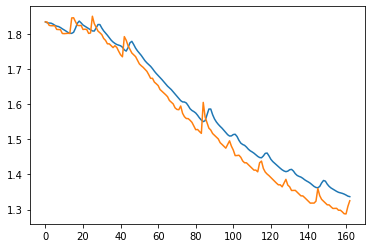

In [ ]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.show()